In [1]:
import pandas as pd
import seaborn as sn
from numpy import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
import missingno as msno

<AxesSubplot:>

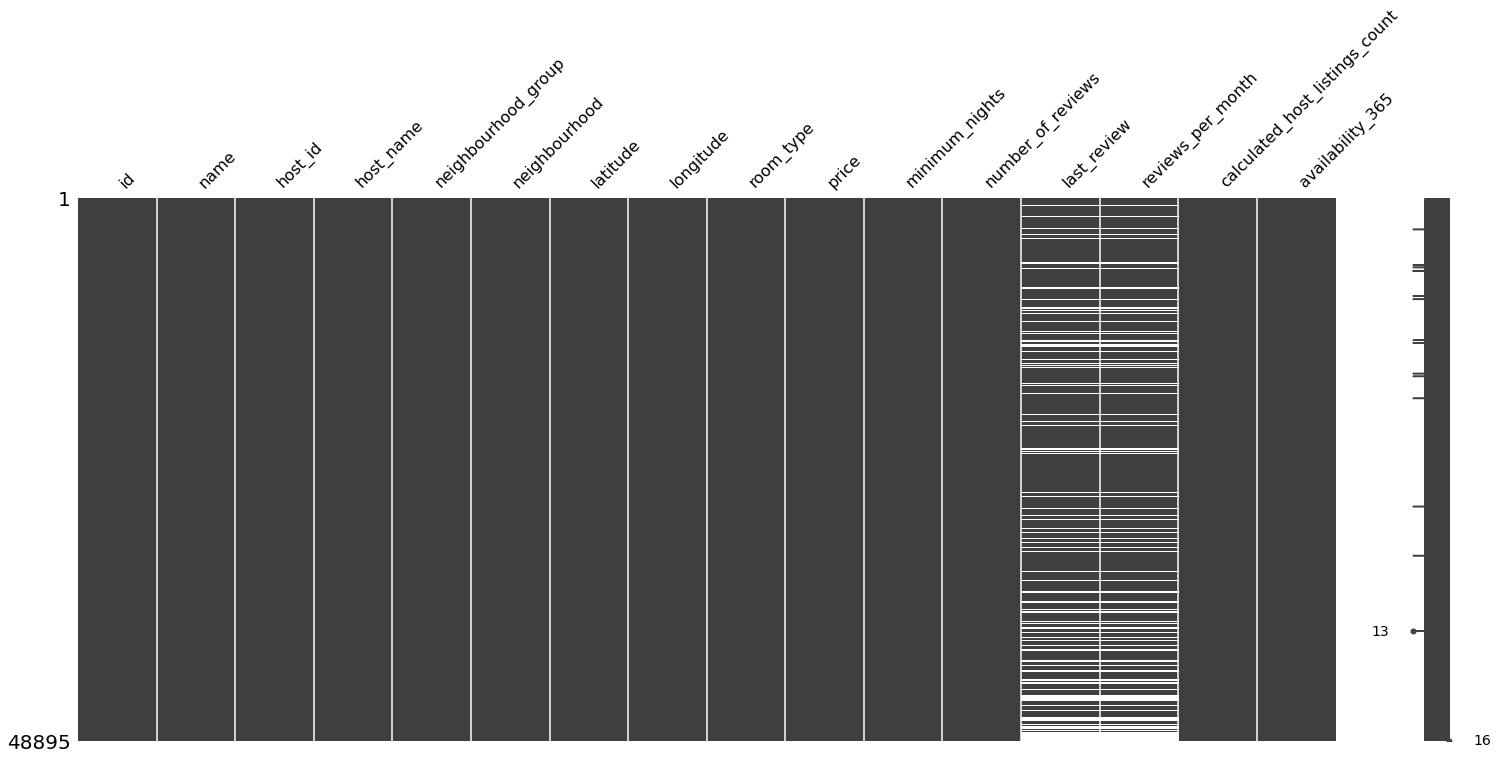

In [6]:
%matplotlib inline
msno.matrix(df)

In [7]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

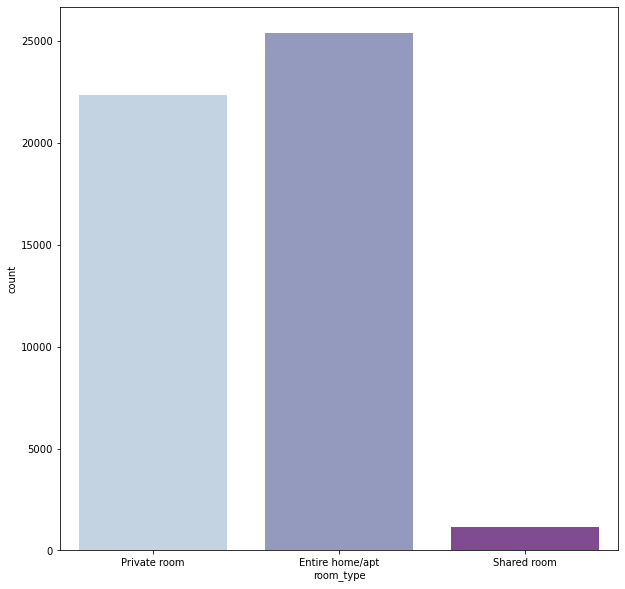

In [8]:
plt.figure(figsize=(10,10))
sn.countplot(x=df.room_type,palette='BuPu')

Text(0.5, 1.0, 'The location of places in AirBNB')

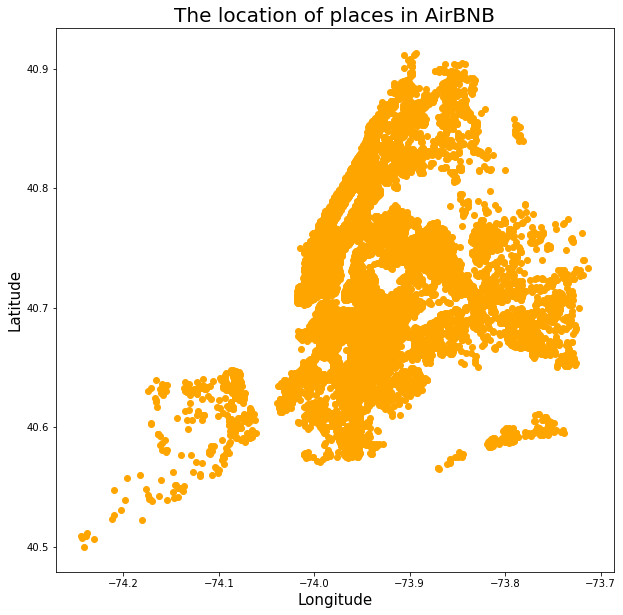

In [9]:
plt.figure(figsize = (10, 10))
plt.scatter(x= df['longitude'],y=df.latitude,color='orange')
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.title("The location of places in AirBNB",fontsize=20)

In [10]:
date_split = df.last_review.iloc[0].split('-')

In [11]:
year = date_split[0]
month = date_split[1]
day = date_split[2]

In [12]:
def date_split(data, feature):
    year_list = []
    month_list = []
    day_list = []
    data_copy = data.copy()
    data_copy.dropna(inplace=True)
    for i in range(len(data_copy[feature])):
        data_split = data_copy[feature].iloc[i].split('-')
        year_list.append(data_split[0])
        month_list.append(data_split[1])
        day_list.append(data_split[2])
    return year_list, month_list, day_list

In [13]:
df_copy = df.copy()

In [14]:
years, months, days = date_split(df_copy, feature='last_review')

In [15]:
from statistics import mode

In [16]:
year_mode = mode(years)
month_mode = mode(months)
days_mode = mode(days)

In [17]:
days_mode

'01'

In [18]:
mode_date = year_mode + '-' + month_mode + '-' + days_mode

In [19]:
mode_date

'2019-06-01'

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
df_copy.last_review.fillna(mode_date, inplace=True)

<AxesSubplot:>

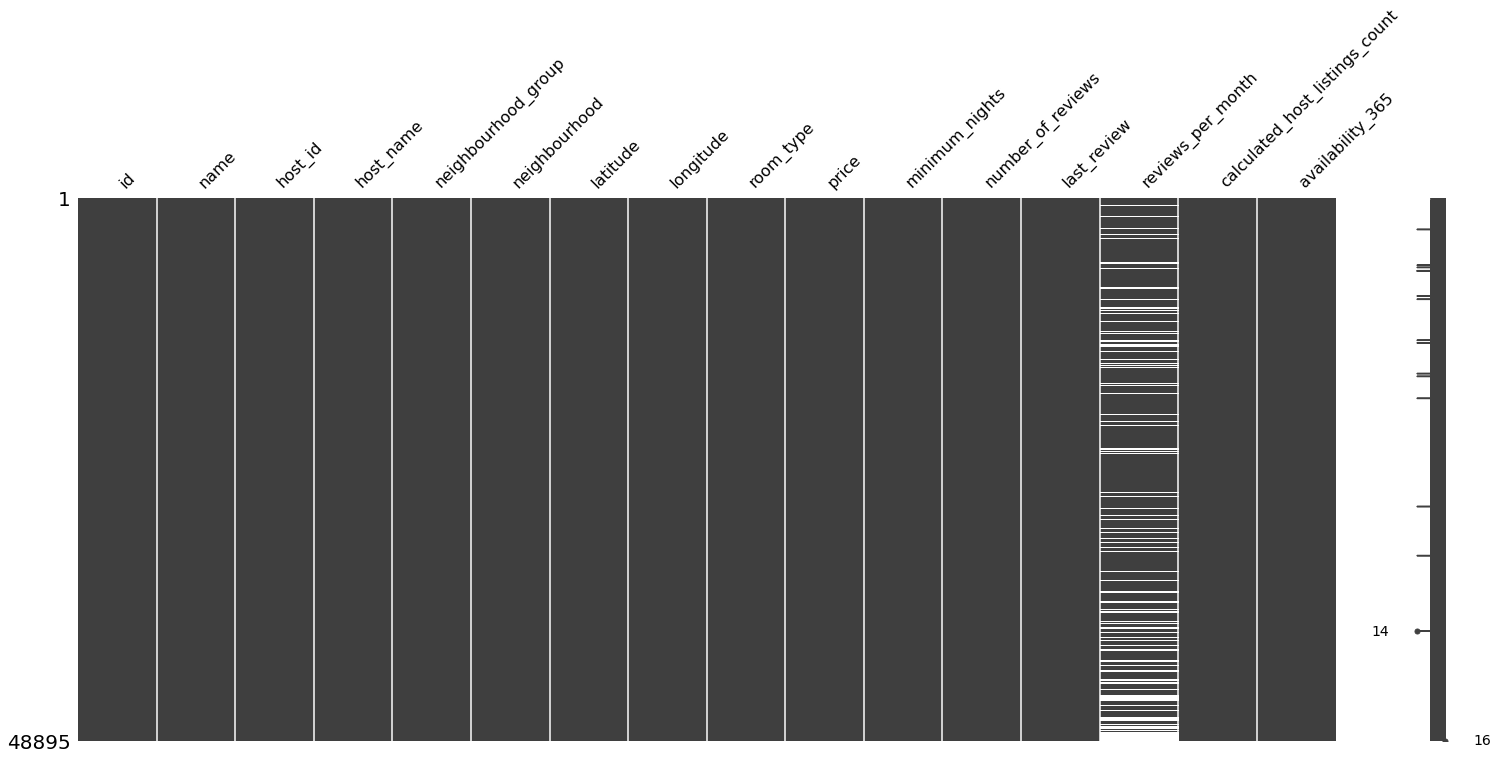

In [22]:
msno.matrix(df_copy)

In [23]:
median_imputer = df_copy.reviews_per_month.median()

In [24]:
df_copy.reviews_per_month.fillna(median_imputer,inplace=True)

<AxesSubplot:>

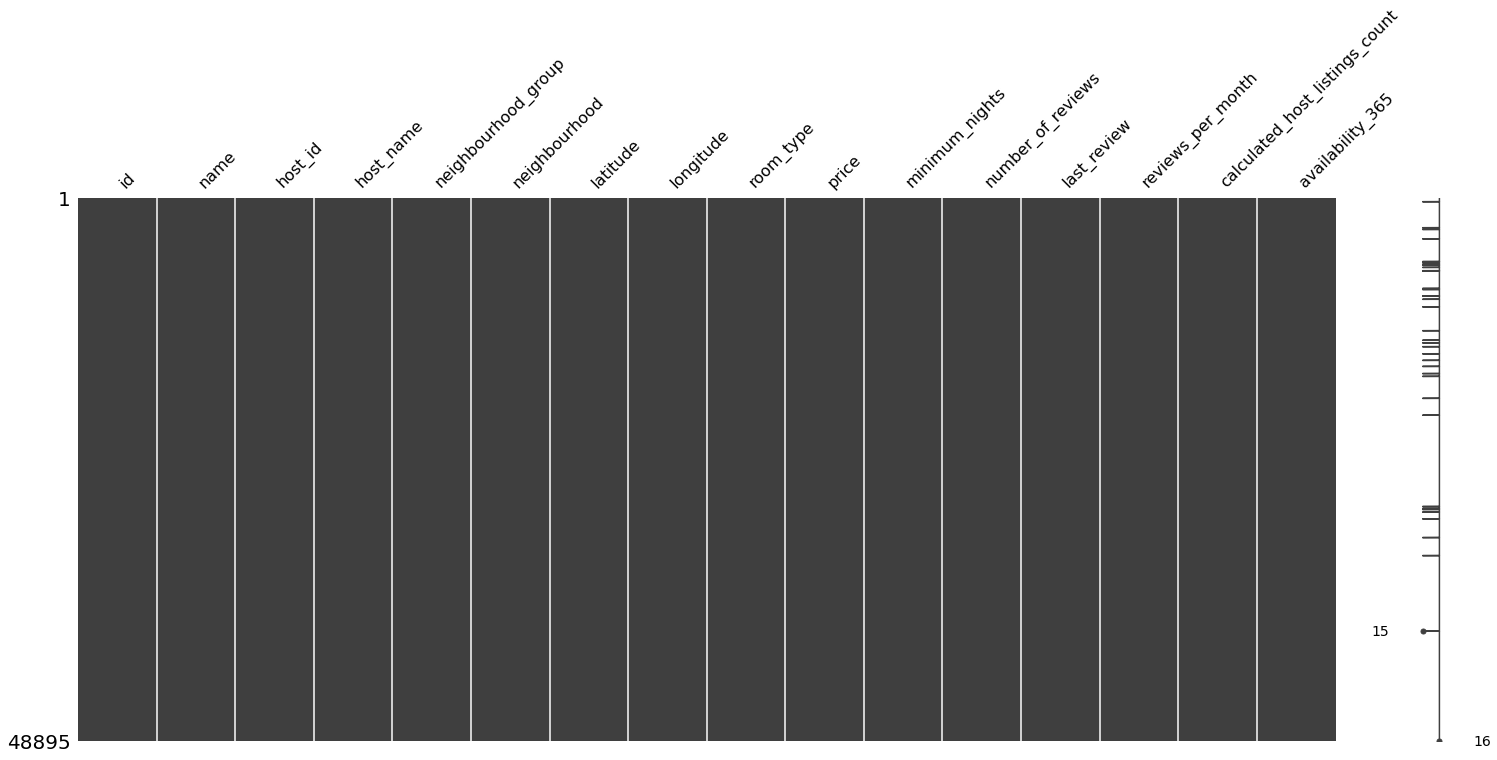

In [25]:
msno.matrix(df_copy)

In [26]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
df_copy['last_review_year'] = df_copy['last_review'].apply(lambda x:x[0:4])
df_copy['last_review_month'] = df_copy['last_review'].apply(lambda x:x[5:7])

In [28]:
df_copy['last_review_year']

0        2018
1        2019
2        2019
3        2019
4        2018
         ... 
48890    2019
48891    2019
48892    2019
48893    2019
48894    2019
Name: last_review_year, Length: 48895, dtype: object

In [29]:
df_copy.drop(['last_review'],1,inplace=True)

In [30]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [31]:
df_copy.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

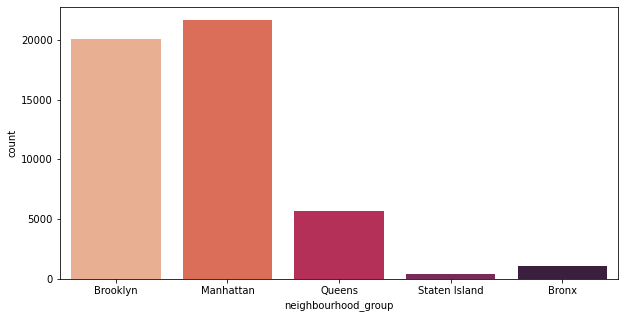

In [32]:
plt.figure(figsize=(10,5))
sn.countplot(x=df_copy.neighbourhood_group,palette='rocket_r')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

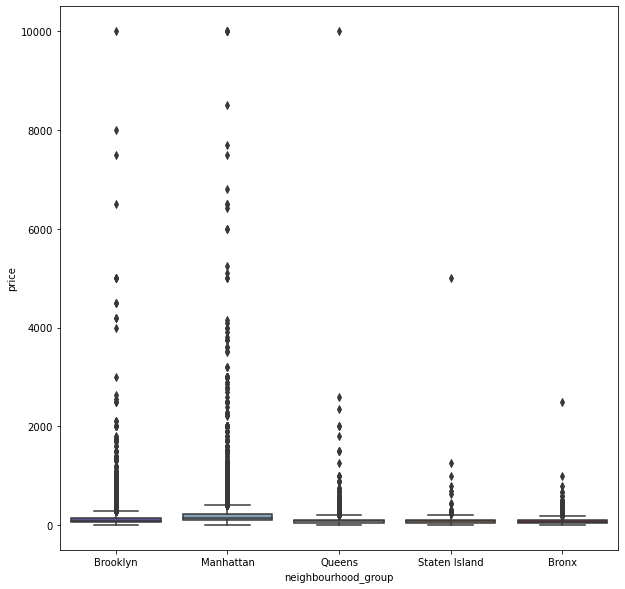

In [33]:
plt.figure(figsize=(10,10))
sn.boxplot(x=df_copy.neighbourhood_group,y=df_copy.price,palette='twilight_shifted')

<AxesSubplot:xlabel='price', ylabel='Density'>

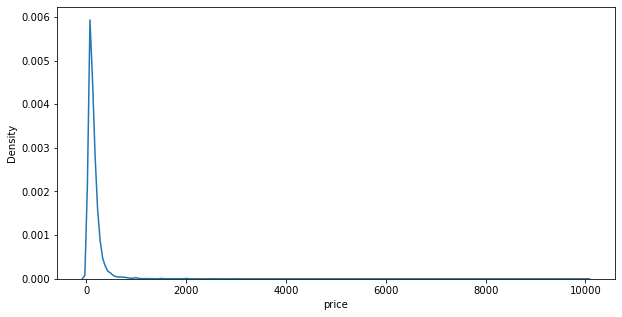

In [34]:
plt.figure(figsize=(10,5))
sn.kdeplot(x=df_copy.price)

In [35]:
len(df_copy.price)

48895

In [36]:
percentile(df_copy.price,99)

799.0

In [37]:
def remove_outliers(data, feature):
    temp_data = df_copy.copy()
    if remove_outliers:
        o_p = percentile(temp_data[feature],99)
        o_r = temp_data[temp_data[feature] < o_p]
        outliers = temp_data[temp_data[feature]>o_p]
        o_r_l = len(outliers)
        print("The number of outliers removed are {}".format(o_r_l))
        return outliers, o_r
    else:
        return temp_data

In [38]:
outliers, outliers_removed = remove_outliers(df_copy, feature='price')

The number of outliers removed are 474


In [39]:
len(outliers_removed)

48403

In [40]:
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7,2016,08
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0,2018,05
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249,2019,05
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297,2018,09
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257,2019,07


<AxesSubplot:xlabel='price', ylabel='Density'>

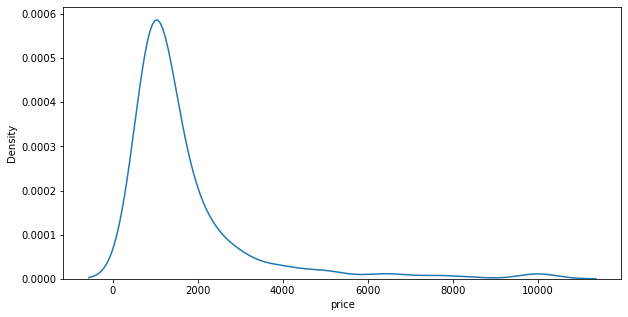

In [41]:
plt.figure(figsize=(10,5))
sn.kdeplot(x=outliers.price,palette='BuPu')

In [42]:
df_copy = outliers_removed.copy()

In [43]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [44]:
df_copy.drop(['name', 'host_id', 'host_name', 'id'], axis = 1, inplace = True)

In [45]:
df_copy.shape

(48403, 13)

In [46]:
df_copy = pd.get_dummies(df_copy, columns=['neighbourhood_group','neighbourhood','room_type'],drop_first=True)

# Creating a Model

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df_copy.drop(['price'],1)
y = df_copy.price

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [50]:
X_train.shape

(38722, 234)

In [51]:
X_test.shape

(9681, 234)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train

array([[-1.28297901,  0.09771724, -0.29353009, ..., -0.06947414,
        -0.91840396, -0.15687059],
       [-0.27591767,  0.1089615 , -0.24452087, ..., -0.06947414,
        -0.91840396, -0.15687059],
       [ 1.83547902,  0.09512241, -0.19551164, ..., -0.06947414,
         1.08884547, -0.15687059],
       ...,
       [ 0.44464417, -0.43011425, -0.0974932 , ..., -0.06947414,
         1.08884547, -0.15687059],
       [ 0.21118654, -0.58104681,  1.12773741, ..., -0.06947414,
        -0.91840396, -0.15687059],
       [ 1.35461504, -0.28480382,  0.39259905, ..., -0.06947414,
        -0.91840396, -0.15687059]])

In [85]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import ComplementNB


models = [ExtraTreesRegressor(n_estimators=20,max_depth=15),
          RandomForestRegressor(n_estimators=800,max_depth=18),DecisionTreeRegressor()]

In [112]:
model = GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000,max_features=15,max_depth=8)

In [113]:
model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, max_features=15, n_estimators=1000)

In [114]:
model.score(X_test,y_test)

0.4937423900408744

In [123]:
y_test

23908    225
23876    225
16350     45
5617     160
30247    100
        ... 
23950    150
12947     99
26514     50
4010     149
30327     60
Name: price, Length: 9681, dtype: int64

In [149]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred

0       275.757485
1       204.959199
2        84.279564
3       205.219032
4       157.247464
           ...    
9676    190.507726
9677    174.647201
9678     67.378087
9679     98.362620
9680     59.597198
Length: 9681, dtype: float64

In [150]:
y_pred = y_pred.to_frame()

In [158]:
y_pred.rename({'0':'Predictions'})

,0
0,275.757485
1,204.959199
2,84.279564
3,205.219032
4,157.247464
...,...
9676,190.507726
9677,174.647201
9678,67.378087
9679,98.362620
